### Imports

In [ ]:
import requests, re, time
import torch, torchvision
from torch import nn, optim
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import os
from PIL import Image
import warnings

### Download and cleanup the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"asfesaefafes","key":"d2fce6eb0eaa460f6893573d61755e34"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              227KB  2021-05-08 09:30:51           4565  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           2617  
mathurinache/twitter-edge-nodes                             Twitter Edge Nodes                                342MB  2021-03-08 06:43:04            281  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52            635  
dhruvildave/wikibooks-dataset                               Wikibooks Datase

In [ ]:
! kaggle datasets download -d sebastiaanjohn/sneakers

100% 8.46G/8.47G [03:17<00:00, 48.7MB/s]
100% 8.47G/8.47G [03:17<00:00, 46.0MB/s]


In [ ]:
! unzip sneakers.zip -d /content/Kaggle_sneakers_dataset

In [ ]:
rootdir = '/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train'
warnings.filterwarnings("error")
#if image won't open delete it
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
      path = os.path.join(subdir, file)
      try:
        im = Image.open(path)
        im.close()
      except:
        os.remove(path)
warnings.resetwarnings()

### Creating and initializing the full dataset

In [ ]:
xform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])
horiz = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(), transforms.RandomHorizontalFlip(1)])
rotate = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(), transforms.RandomRotation(180)])
perspective = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(), transforms.RandomPerspective(distortion_scale=0.5, p=1.0, fill=0)])

normal_dataset = datasets.ImageFolder('/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train', transform=xform)
horiz_flip_dataset = datasets.ImageFolder('/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train', transform=horiz)
rotate_dataset = datasets.ImageFolder('/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train', transform=rotate)
perspective_dataset = datasets.ImageFolder('/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train', transform=perspective)
dataset_full = normal_dataset + perspective_dataset + rotate_dataset + horiz_flip_dataset

In [ ]:
rng = torch.Generator().manual_seed(1549)

In [ ]:
#real dataset
n_all = len(dataset_full)
n_train = int(0.8 * n_all)
n_test = n_all - n_train

dataset_train, dataset_test = torch.utils.data.random_split(dataset_full, [n_train, n_test], rng)

loader_train = torch.utils.data.DataLoader(dataset_train, batch_size = 8, shuffle=True)
loader_test = torch.utils.data.DataLoader(dataset_test, batch_size = 8, shuffle=True)

categories = 0
path = '/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train'

for folders in os.listdir(path):
    categories += 1

print(categories)
print(len(dataset_full))
print(len(dataset_train))
print(len(dataset_test))
#categories should = 899 

899
211080
168864
42216


### Create a small dataset with 12 similar shoes for testing

In [ ]:
! mkdir small_test

In [ ]:
# !cp -R '/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train/A Bathing Ape Bapesta Kanye West College Dropout' '/content/small_test'
# !cp -R '/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train/A Bathing Ape Bapesta Ronnie Fieg Fiegsta Sand' '/content/small_test'
# !cp -R '/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train/ACE 16 PureControl Ultra Boost Kith Flamingos' '/content/small_test'
# !cp -R '/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train/ASICS GT-II Ronnie Fieg ""High Risk"""' '/content/small_test'
# !cp -R '/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train/ASICS Gel-Lyte III Afew ""Koi"""' '/content/small_test'
# !cp -R '/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train/ASICS Gel-Lyte III Hanon ""Wildcats"""' '/content/small_test'
# !cp -R '/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train/ASICS Gel-Lyte III Ronnie Fieg ""Flamingo"""' '/content/small_test'
# !cp -R '/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train/ASICS Gel-Lyte III Ronnie Fieg ""Homage"" (Special Box)"' '/content/small_test'
# !cp -R '/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train/ASICS Gel-Lyte III Ronnie Fieg ""Leatherbacks"""' '/content/small_test'
# !cp -R '/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train/ASICS Gel-Lyte III Ronnie Fieg ""Mint Leaf"""' '/content/small_test'

In [ ]:
!cp -R '/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train/Jordan 1 OG Chicago (1985)' '/content/small_test'
!cp -R '/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train/Jordan 1 Retro Black Metallic Gold (2013)' '/content/small_test'
!cp -R '/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train/Jordan 1 Retro Black Royal Blue (2001)' '/content/small_test'
!cp -R '/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train/Jordan 1 Retro Bred ""Banned"" (2016)"' '/content/small_test'
!cp -R '/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train/Jordan 1 Retro High ""Not for Resale"" Varsity Maize"' '/content/small_test'
!cp -R '/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train/Jordan 1 Retro High Aleali May Court Lux (W)' '/content/small_test'
!cp -R '/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train/Jordan 1 Retro High Bio Beige Anthracite Mystic Green (W)' '/content/small_test'
!cp -R '/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train/Jordan 1 Retro High Black Crimson Tint' '/content/small_test'
!cp -R '/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train/Jordan 1 Retro High Black Gym Red' '/content/small_test'
!cp -R '/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train/Jordan 1 Retro High Blue Moon' '/content/small_test'
!cp -R '/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train/Jordan 1 Retro High Bred Toe' '/content/small_test'
!cp -R '/content/Kaggle_sneakers_dataset/sneaker_dataset/images/train/Jordan 1 Retro High Camo 3M Bred' '/content/small_test'

In [ ]:
xform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])
# horiz = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(), transforms.RandomHorizontalFlip(1)])
rotate = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(), transforms.RandomRotation(180)])
perspective = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(), transforms.RandomPerspective()])

normal_dataset = datasets.ImageFolder('/content/small_test', transform=xform)
# horiz_flip_dataset = datasets.ImageFolder('/content/small_test', transform=horiz)
rotate_dataset = datasets.ImageFolder('/content/small_test', transform=rotate)
perspective_dataset = datasets.ImageFolder('/content/small_test', transform=perspective)

small_dataset = normal_dataset + rotate_dataset + perspective_dataset + horiz_flip_dataset

In [ ]:
rng = torch.Generator().manual_seed(1549)

In [ ]:
# small dataset
n_small = len(small_dataset)
n_train_small = int(0.8 * n_small)
n_test_small = n_small - n_train_small

dataset_train, dataset_test = torch.utils.data.random_split(small_dataset, [n_train_small, n_test_small], rng)

loader_train = torch.utils.data.DataLoader(dataset_train, batch_size = 32, shuffle=True)
loader_test = torch.utils.data.DataLoader(dataset_test, batch_size = 32, shuffle=True)

categories = 0
path = '/content/small_test'

for folders in os.listdir(path):
    categories += 1

print(categories)
print(len(small_dataset))
print(len(dataset_train))
print(len(dataset_test))
# categories should = 12

12
2031
1624
407


#### Checking photos in the full and small datasets

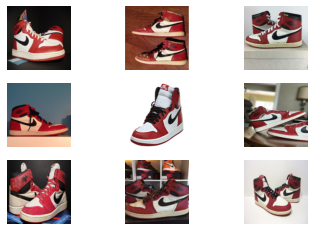

In [ ]:
for x in range(9):
  plt.subplot(3,3,x+1)
  plt.axis('off')
  plt.imshow(small_dataset[x][0].permute(1,2,0))

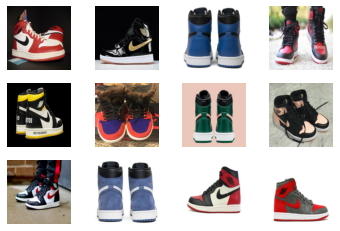

In [ ]:
for x in range(12):
  for y in range(len(small_dataset)):
    if small_dataset[y][1] == x:
      plt.subplot(3,4,x+1)
      plt.axis('off')    
      plt.imshow(small_dataset[y][0].permute(1,2,0))
      break

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


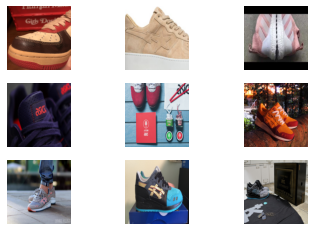

In [ ]:
for x in range(9):
  for y in range(len(dataset_full)):
    if dataset_full[y][1] == x:
      plt.subplot(3,3,x+1)
      plt.axis('off')    
      plt.imshow(dataset_full[y][0].permute(1,2,0))
      break

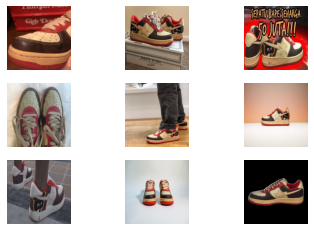

In [ ]:
for x in range(9):
  if dataset_full[x][1] == 0:
    plt.subplot(3,3,x+1)
    plt.axis('off')
    plt.imshow(dataset_full[x][0].permute(1,2,0))
    # print(dataset_full[x][1])

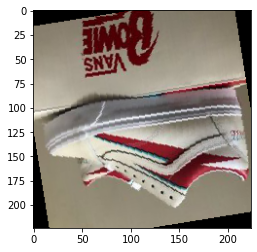

In [ ]:
 plt.imshow(dataset_full[200002][0].permute(1,2,0))

### Preparing the model

If you are loading a saved model go to the load the model section

In [ ]:
# Do not use if you are loading a saved model
model = models.resnet18(pretrained=True)

layer1 = torch.nn.Linear(model.fc.in_features, 500)
layer2 = torch.nn.Linear(500, 500)
layer3 = torch.nn.Linear(500, categories) 
torch.nn.init.xavier_uniform_(layer1.weight)
torch.nn.init.xavier_uniform_(layer2.weight)
torch.nn.init.xavier_uniform_(layer3.weight)

model.fc = nn.Sequential(
          layer1,
          nn.ReLU(),
          layer2,
          nn.ReLU(),
          layer3
        )

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
from google.colab import files
files.upload()

Saving entire_model_epoch14.pt to entire_model_epoch14.pt


In [ ]:
# Load entire model
ENTIRE_MODEL_PATH = "entire_model_epoch14.pt"
model = torch.load(ENTIRE_MODEL_PATH)
model.train()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# Load model with state dictionary 
model = models.resnet18(pretrained=True)
layer1 = torch.nn.Linear(model.fc.in_features, 500)
layer2 = torch.nn.Linear(500, 500)
layer3 = torch.nn.Linear(500, categories) 
torch.nn.init.xavier_uniform_(layer1.weight)
torch.nn.init.xavier_uniform_(layer2.weight)
torch.nn.init.xavier_uniform_(layer3.weight)

model.fc = nn.Sequential(
          layer1,
          nn.ReLU(),
          layer2,
          nn.ReLU(),
          layer3
        )

STATE_PATH = "state_dict_epoch7.pt"
model.load_state_dict(torch.load(STATE_PATH))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [ ]:
device = torch.device('cuda:0')
model = model.to(device)

In [ ]:
print(categories, len(dataset_full), len(dataset_train), len(dataset_test))

899 211080 168864 42216


In [ ]:
criterion = nn.CrossEntropyLoss()

def run_test(model):
    nsamples_test = len(dataset_test)
    loss, correct = 0, 0
    model.eval()
    with torch.no_grad():
        for samples, labels in loader_test:
            samples = samples.to(device)
            labels = labels.to(device)
            outs = model(samples)
            loss += criterion(outs, labels)
            _, preds = torch.max(outs.detach(), 1)
            correct_mask = preds == labels
            correct += correct_mask.sum(0).item()
    return loss / nsamples_test, correct / nsamples_test

In [ ]:
def run_train(model, opt, sched):
    nsamples_train = len(dataset_train)
    loss_sofar, correct_sofar = 0, 0
    model.train()
    with torch.enable_grad():
        for samples, labels in loader_train:
            samples = samples.to(device)
            labels = labels.to(device)
            opt.zero_grad()
            outs = model(samples)
            _, preds = torch.max(outs.detach(), 1)
            loss = criterion(outs, labels)
            loss.backward()
            opt.step()
            loss_sofar += loss.item() * samples.size(0)
            correct_sofar += torch.sum(preds == labels.detach())
    sched.step()
    return loss_sofar / nsamples_train, correct_sofar / nsamples_train

In [ ]:
def run_all(model, optimizer, scheduler, n_epochs):
    for epoch in range(n_epochs):
        loss_train, acc_train = run_train(model, optimizer, scheduler)
        loss_test, acc_test = run_test(model)
        print(f"epoch {epoch}: train loss {loss_train:.4f} acc {acc_train:.4f}, test loss {loss_test:.4f} acc {acc_test:.4f}")

In [ ]:
run_test(model)

(tensor(0.0897, device='cuda:0'), 0.08487084870848709)

In [ ]:
run_all(model, optimizer, scheduler, 1)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch 0: train loss 0.1300 acc 0.9570, test loss 0.0140 acc 0.9620


###Save the model

In [ ]:
# Save entire model
ENTIRE_MODEL_PATH = "entire_model_epoch15.pt"

torch.save(model, ENTIRE_MODEL_PATH)
from google.colab import files
files.download(ENTIRE_MODEL_PATH)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save model with state dictionary
STATE_PATH = "state_dict_epoch15.pt"

torch.save(model.state_dict(), STATE_PATH)
from google.colab import files
files.download(STATE_PATH) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Training and testing log for small dataset


In [ ]:
loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=4, shuffle=True)
loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=4, shuffle=True)

In [ ]:
model = models.resnet18(pretrained=True)

layer1 = torch.nn.Linear(model.fc.in_features, 500)
layer2 = torch.nn.Linear(500, 500)
layer3 = torch.nn.Linear(500, categories) 
torch.nn.init.xavier_uniform_(layer1.weight)
torch.nn.init.xavier_uniform_(layer2.weight)
torch.nn.init.xavier_uniform_(layer3.weight)

model.fc = nn.Sequential(
          layer1,
          nn.ReLU(),
          layer2,
          nn.ReLU(),
          layer3
        )

In [ ]:
device = torch.device('cuda:0')
model = model.to(device)

In [ ]:
optimizer = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.95)
# optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

| test # | optimizer | scheduler | learning rate | momentum | step size | gamma | minibatch | test loss | test acc | best epoch |
|--------|-----------|-----------|---------------|----------|-----------|-------|-----------|-----------|----------|------------|
| 1      | SGD       | StepLR    | 0.001         | 0.9      | 5         | 0.1   | 32        | 0.0209    | 0.8280   | 8        |
| 2      | SGD       | StepLR    | 0.0001        | 0.9      | 5         | 0.1   | 4        | 0.2631   | 0.6830   | 7      |
| 3      | SGD       | StepLR    | 0.001         | 0.9      | 5         | 0.1   | 4        | 0.1063   | 0.8771   | 9      |
| 4      | SGD       | StepLR    | 0.001         | 0.9      | 3         | 0.1   | 4        | 0.1158   | 0.8354   | 6      |
| 5      | SGD       | StepLR    | 0.001         | 0.5      | 5         | 0.1   | 4        | 0.1521   | 0.8157   | 9      |
| 6      | SGD       | StepLR    | 0.001         | 0.95     | 5         | 0.1   | 8        | 0.0368   | 0.9140   | 9      |
| 7      | SGD       | StepLR    | 0.001         | 0.95     | 5         | 0.1   | 16       | 0.0206   | 0.8943   | 7      |
| 8      | SGD       | StepLR    | 0.001         | 0.95     | 5         | 0.1   | 4       | 0.0909   | 0.8722   | 7      |


Test 1

In [ ]:
run_all(model, optimizer, scheduler, 10)

epoch 0: train loss 2.2368 acc 0.2635, test loss 0.0580 acc 0.4693
epoch 1: train loss 1.5917 acc 0.5683, test loss 0.0437 acc 0.6192
epoch 2: train loss 1.1870 acc 0.6663, test loss 0.0332 acc 0.6757
epoch 3: train loss 0.9196 acc 0.7414, test loss 0.0260 acc 0.7961
epoch 4: train loss 0.7362 acc 0.8005, test loss 0.0226 acc 0.8034
epoch 5: train loss 0.6470 acc 0.8362, test loss 0.0214 acc 0.8182
epoch 6: train loss 0.6223 acc 0.8411, test loss 0.0211 acc 0.8256
epoch 7: train loss 0.6101 acc 0.8442, test loss 0.0208 acc 0.8182
epoch 8: train loss 0.6005 acc 0.8430, test loss 0.0209 acc 0.8280
epoch 9: train loss 0.6053 acc 0.8344, test loss 0.0208 acc 0.8256


Test 2

In [ ]:
run_all(model, optimizer, scheduler, 10)

epoch 0: train loss 2.3119 acc 0.2180, test loss 0.5181 acc 0.3538
epoch 1: train loss 2.0116 acc 0.3922, test loss 0.4368 acc 0.4988
epoch 2: train loss 1.7529 acc 0.4791, test loss 0.3661 acc 0.5848
epoch 3: train loss 1.5581 acc 0.5283, test loss 0.3132 acc 0.6143
epoch 4: train loss 1.3966 acc 0.5911, test loss 0.2644 acc 0.6437
epoch 5: train loss 1.3177 acc 0.6078, test loss 0.2648 acc 0.6658
epoch 6: train loss 1.2623 acc 0.6145, test loss 0.2666 acc 0.6609
epoch 7: train loss 1.2654 acc 0.6281, test loss 0.2631 acc 0.6830
epoch 8: train loss 1.2246 acc 0.6392, test loss 0.2600 acc 0.6683
epoch 9: train loss 1.2182 acc 0.6244, test loss 0.2464 acc 0.6830


Test 3

In [ ]:
run_all(model, optimizer, scheduler, 10)

epoch 0: train loss 1.8145 acc 0.4144, test loss 0.2315 acc 0.6855
epoch 1: train loss 1.2421 acc 0.5893, test loss 0.1774 acc 0.7592
epoch 2: train loss 1.0424 acc 0.6502, test loss 0.1384 acc 0.8182
epoch 3: train loss 0.8881 acc 0.6964, test loss 0.1415 acc 0.8157
epoch 4: train loss 0.8315 acc 0.7100, test loss 0.1321 acc 0.8231
epoch 5: train loss 0.6744 acc 0.7808, test loss 0.1107 acc 0.8477
epoch 6: train loss 0.6585 acc 0.7820, test loss 0.1063 acc 0.8550
epoch 7: train loss 0.6603 acc 0.7839, test loss 0.1099 acc 0.8698
epoch 8: train loss 0.6392 acc 0.7950, test loss 0.1042 acc 0.8403
epoch 9: train loss 0.5977 acc 0.7974, test loss 0.1063 acc 0.8771


Test 4

In [ ]:
run_all(model, optimizer, scheduler, 10)

epoch 0: train loss 1.9016 acc 0.3633, test loss 0.2679 acc 0.6339
epoch 1: train loss 1.2461 acc 0.5764, test loss 0.1715 acc 0.7690
epoch 2: train loss 1.0200 acc 0.6515, test loss 0.1415 acc 0.7912
epoch 3: train loss 0.7389 acc 0.7438, test loss 0.1262 acc 0.8157
epoch 4: train loss 0.7025 acc 0.7672, test loss 0.1335 acc 0.8157
epoch 5: train loss 0.7039 acc 0.7654, test loss 0.1259 acc 0.8034
epoch 6: train loss 0.6814 acc 0.7789, test loss 0.1158 acc 0.8354
epoch 7: train loss 0.6947 acc 0.7703, test loss 0.1308 acc 0.8256
epoch 8: train loss 0.7103 acc 0.7654, test loss 0.1302 acc 0.8084
epoch 9: train loss 0.6743 acc 0.7833, test loss 0.1257 acc 0.8206


Test 5

In [ ]:
run_all(model, optimizer, scheduler, 10)

epoch 0: train loss 2.2483 acc 0.2605, test loss 0.4664 acc 0.4226
epoch 1: train loss 1.7728 acc 0.4569, test loss 0.3160 acc 0.6609
epoch 2: train loss 1.4285 acc 0.5523, test loss 0.2482 acc 0.7076
epoch 3: train loss 1.1973 acc 0.6182, test loss 0.2046 acc 0.7445
epoch 4: train loss 1.0729 acc 0.6490, test loss 0.1765 acc 0.7740
epoch 5: train loss 0.9927 acc 0.6903, test loss 0.1827 acc 0.7641
epoch 6: train loss 0.9849 acc 0.6964, test loss 0.1821 acc 0.7568
epoch 7: train loss 0.9306 acc 0.7124, test loss 0.1666 acc 0.7936
epoch 8: train loss 0.9325 acc 0.7254, test loss 0.1584 acc 0.7912
epoch 9: train loss 0.9202 acc 0.7118, test loss 0.1521 acc 0.8157


Test 6

In [ ]:
run_all(model, optimizer, scheduler, 10)

epoch 0: train loss 1.7421 acc 0.4273, test loss 0.1204 acc 0.6781
epoch 1: train loss 0.9843 acc 0.6724, test loss 0.0870 acc 0.7396
epoch 2: train loss 0.7557 acc 0.7365, test loss 0.0709 acc 0.7961
epoch 3: train loss 0.7040 acc 0.7543, test loss 0.0913 acc 0.7052
epoch 4: train loss 0.5839 acc 0.7913, test loss 0.0590 acc 0.8378
epoch 5: train loss 0.4117 acc 0.8719, test loss 0.0465 acc 0.8870
epoch 6: train loss 0.4180 acc 0.8688, test loss 0.0442 acc 0.8747
epoch 7: train loss 0.3842 acc 0.8787, test loss 0.0500 acc 0.8550
epoch 8: train loss 0.3747 acc 0.8799, test loss 0.0477 acc 0.8624
epoch 9: train loss 0.4064 acc 0.8658, test loss 0.0368 acc 0.9140


Test 7

In [ ]:
run_all(model, optimizer, scheduler, 10)

epoch 0: train loss 1.8854 acc 0.3781, test loss 0.0763 acc 0.6388
epoch 1: train loss 0.9406 acc 0.7038, test loss 0.0420 acc 0.8157
epoch 2: train loss 0.6375 acc 0.7894, test loss 0.0385 acc 0.8084
epoch 3: train loss 0.5380 acc 0.8239, test loss 0.0375 acc 0.8108
epoch 4: train loss 0.5249 acc 0.8202, test loss 0.0235 acc 0.8845
epoch 5: train loss 0.3423 acc 0.8990, test loss 0.0228 acc 0.8796
epoch 6: train loss 0.3274 acc 0.8996, test loss 0.0223 acc 0.8919
epoch 7: train loss 0.3290 acc 0.8990, test loss 0.0206 acc 0.8943
epoch 8: train loss 0.3305 acc 0.9015, test loss 0.0221 acc 0.8870
epoch 9: train loss 0.3343 acc 0.9027, test loss 0.0230 acc 0.8845


Test 8

In [ ]:
run_all(model, optimizer, scheduler, 10)

epoch 0: train loss 1.8797 acc 0.3627, test loss 0.2459 acc 0.6609
epoch 1: train loss 1.2825 acc 0.5696, test loss 0.2015 acc 0.6978
epoch 2: train loss 1.1275 acc 0.6004, test loss 0.1449 acc 0.7961
epoch 3: train loss 1.0233 acc 0.6533, test loss 0.1519 acc 0.7936
epoch 4: train loss 0.8779 acc 0.7001, test loss 0.1289 acc 0.8378
epoch 5: train loss 0.7278 acc 0.7543, test loss 0.1159 acc 0.8428
epoch 6: train loss 0.6313 acc 0.7900, test loss 0.1060 acc 0.8501
epoch 7: train loss 0.6792 acc 0.7808, test loss 0.0909 acc 0.8722
epoch 8: train loss 0.6112 acc 0.7913, test loss 0.1128 acc 0.8378
epoch 9: train loss 0.6156 acc 0.7876, test loss 0.1064 acc 0.8501


#### Test run with 6 similar shoes with data augmentation using Adam optimizer and StepLR scheduler.
epoch 0: train loss 0.7798 acc 0.7046, test loss 0.0623 acc 0.9212 \\
epoch 1: train loss 0.5777 acc 0.7948, test loss 0.0629 acc 0.9261 \\
epoch 2: train loss 0.5962 acc 0.7911, test loss 0.0448 acc 0.9360 \\
epoch 3: train loss 0.5110 acc 0.8294, test loss 0.0351 acc 0.9507 \\
epoch 4: train loss 0.3494 acc 0.8776, test loss 0.0244 acc 0.9655 \\
epoch 5: train loss 0.3552 acc 0.8813, test loss 0.0204 acc 0.9507 \\
epoch 6: train loss 0.2932 acc 0.9036, test loss 0.0247 acc 0.9655 \\
epoch 7: train loss 0.2899 acc 0.9011, test loss 0.0214 acc 0.9655 \\
epoch 8: train loss 0.2879 acc 0.8888, test loss 0.0153 acc 0.9754 \\
epoch 9: train loss 0.3038 acc 0.8900, test loss 0.0188 acc 0.9704 \\



### Training and testing log for full dataset

####test run with no data augmentation and default optimizer/scheduler 
epoch 0: train loss 2.5095 acc 0.4107, test loss 0.3937 acc 0.6182 \\
epoch 1: train loss 1.7194 acc 0.5706, test loss 0.3227 acc 0.6866

#### small dataset With adam 5000 to 2000 to 
epoch 0: train loss 1.8016 acc 0.4215, test loss 0.1890 acc 0.7740 \\
epoch 1: train loss 0.8763 acc 0.7008, test loss 0.1262 acc 0.8446 \\
epoch 2: train loss 0.7749 acc 0.7355, test loss 0.0836 acc 0.8955 \\
epoch 3: train loss 0.6171 acc 0.7992, test loss 0.0533 acc 0.9492 \\
epoch 4: train loss 0.6289 acc 0.8027, test loss 0.0597 acc 0.9350 \\
epoch 5: train loss 0.4218 acc 0.8678, test loss 0.0481 acc 0.9350 \\
epoch 6: train loss 0.3780 acc 0.8769, test loss 0.0435 acc 0.9576 \\
epoch 7: train loss 0.3153 acc 0.9066, test loss 0.0398 acc 0.9605 \\
epoch 8: train loss 0.3288 acc 0.8883, test loss 0.0301 acc 0.9689 \\
epoch 9: train loss 0.3593 acc 0.8784, test loss 0.0505 acc 0.9492 \\

no augment full dataset, batch size = 32 \\
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) \\
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1) \\
500 500 \\
epoch 0: train loss 6.1859 acc 0.0454, test loss 0.1447 acc 0.1798 \\
epoch 1: train loss 3.1199 acc 0.3759, test loss 0.0628 acc 0.5466 \\
epoch 2: train loss 1.4818 acc 0.6559, test loss 0.0385 acc 0.7037 \\
epoch 3: train loss 0.8823 acc 0.7832, test loss 0.0305 acc 0.7639 \\
epoch 4: train loss 0.5797 acc 0.8543, test loss 0.0270 acc 0.7846 \\
epoch 5: train loss 0.2877 acc 0.9368, test loss 0.0212 acc 0.8368 \\
epoch 6: train loss 0.2339 acc 0.9511, test loss 0.0211 acc 0.8356 \\
epoch 7: train loss 0.2154 acc 0.9553, test loss 0.0211 acc 0.8354 \\
epoch 8: train loss 0.1980 acc 0.9596, test loss 0.0209 acc 0.8388 \\
epoch 9: train loss 0.1835 acc 0.9625, test loss 0.0209 acc 0.8399 \\

all augment full dataset, batch size = 32 \\
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) \\
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1) \\
500 500 \\
epoch 0: train loss 3.2306 acc 0.4026, test loss 0.0307 acc 0.7570 \\
epoch 1: train loss 0.7468 acc 0.8090, test loss 0.0166 acc 0.8623 \\
about 4 hours

optimizer = optim.SGD(**model.fc.parameters()**, lr=0.001, momentum=0.9) \\
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1) \\
9h32m runtime \\
epoch 0: train loss 5.3263 acc 0.1097, test loss 0.1007 acc 0.3293 \\
epoch 1: train loss 2.6442 acc 0.4218, test loss 0.0648 acc 0.5302 \\
epoch 2: train loss 1.9691 acc 0.5466, test loss 0.0546 acc 0.5907 \\
epoch 3: train loss 1.6796 acc 0.6043, test loss 0.0484 acc 0.6309 \\

only random perspective augment, batch size = 8 \\
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.95) \\
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1) \\
layer features = 500 500 899 \\
runtime 8h \\
epoch 0: train loss 3.5650 acc 0.2820, test loss 0.2172 acc 0.5704 \\
epoch 1: train loss 1.5589 acc 0.6102, test loss 0.1421 acc 0.7160 \\
epoch 2: train loss 1.0881 acc 0.7141, test loss 0.1166 acc 0.7643 \\
epoch 3: train loss 0.8519 acc 0.7697, test loss 0.0977 acc 0.7974 \\
epoch 4: train loss 0.6880 acc 0.8073, test loss 0.0922 acc 0.8130 \\
epoch 5: train loss 0.3089 acc 0.9089, test loss 0.0512 acc 0.8920 \\
epoch 6: train loss 0.2312 acc 0.9294, test loss 0.0486 acc 0.9010 \\
epoch 7: train loss 0.2028 acc 0.9375, test loss 0.0464 acc 0.9046 \\
epoch 8: train loss 0.1812 acc 0.9431, test loss 0.0467 acc 0.9052 \\

real one \\
epoch 0: train loss 2.7850 acc 0.3990, test loss 0.1537 acc 0.6899 \\
epoch 1: train loss 1.2334 acc 0.6812, test loss 0.1003 acc 0.7901 \\
epoch 2: train loss 0.9083 acc 0.7555, test loss 0.1001 acc 0.7907 \\
epoch 3: train loss 0.9100 acc 0.7554, test loss 0.1014 acc 0.7887 \\
epoch 4: train loss 0.8689 acc 0.7657, test loss 0.0797 acc 0.8291 \\
epoch 5: train loss 0.6693 acc 0.8129, test loss 0.0691 acc 0.8491 \\
epoch 6: train loss 0.5431 acc 0.8438, test loss 0.0587 acc 0.8691 \\
epoch 7: train loss 0.5367 acc 0.8452, test loss 0.0508 acc 0.8812 \\
epoch 8: train loss 0.4554 acc 0.8654, test loss 0.0433 acc 0.8968 \\
epoch 9: train loss 0.3944 acc 0.8827, test loss 0.0442 acc 0.8982 \\
epoch 10: train loss 0.2230 acc 0.9298, test loss 0.0284 acc 0.9299 \\
epoch 11: train loss 0.1838 acc 0.9409, test loss 0.0273 acc 0.9329 \\
epoch 12: train loss 0.1672 acc 0.9449, test loss 0.0257 acc 0.9360 \\
epoch 13: train loss 0.1570 acc 0.9486, test loss 0.0265 acc 0.9376 \\
epoch 14: train loss 0.1506 acc 0.9503, test loss 0.0145 acc 0.9616 r \\
epoch 15: train loss 0.1319 acc 0.9560, test loss 0.0146 acc 0.9620 